In [120]:
#Name = Faisal Alzahrani 
#ID = 201829740 

#Name = Abdulmohsen Abanmy
#ID = 201920790

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv("Dataset-vf.csv")
dataset.head(10)

X5     X2  X3   X4    X6    X1   X10   X7   X8   X9   X11  X12  X15  \
0   43   59.0  11  120   150  2709  2114  228  217  120  0.66  269   R1   
1    0   54.0   7    0   693  2802   162  224  225  136  0.35  195  NaN   
2    0   28.0  12    0  1260  2325   162  215  213  133  0.89  750  NaN   
3   16  112.0   8  272  3649  2837  6221  235  231  128  0.27 -155  NaN   
4   10   59.0   7  134   900  2509  5184  226  226  134  0.93   88  NaN   
5    9   75.0   7   95  1889  2892  2371  228  228  133  0.79   39  NaN   
6   91    NaN  15  819  2190  2848  1717  181  245  203  0.98 -408  NaN   
7  139  130.0  27  228   300  2380  1855  252  212   69  0.51  231  NaN   
8   -2    0.0   9  124  5394  3208   900  206  222  154  0.97 -740   R2   
9    3  357.0  12   30   658  2273   698  201  218  155  0.48  648  NaN   

     X13    X14         Y  
0   FC11   CA49       BMW  
1   FC11   CA50       BMW  
2   FC14   CA26  Mercedes  
3   FC11   CA32      Ford  
4   FC11   CA38       BMW  
5   FC13   CA42    Toyota  
6   FC13   CA37       BMW  
7   FC14   CA23  Mercedes  
8   FC11   CA42    Toyota  
9   FC14   CA24     Honda

In [3]:
print("the number of examples and features: ")
print(dataset.shape)
print("Statistics for numerical values: ")
print(dataset.describe())
print()
print("the type of each column")
display(dataset.info())
print()

print("the number of classes")
print(dataset['Y'].unique())

the number of examples and features: 
(6124, 16)
Statistics for numerical values: 
                X5           X2           X3           X4           X6  \
count  6124.000000  5520.000000  6124.000000  6124.000000  6124.000000   
mean     47.550621   151.293659    16.794579   192.488080  1541.308459   
std      57.465790   103.437461     8.995704   179.689943  1296.494523   
min    -134.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    71.000000    10.000000    42.000000   636.000000   
50%      27.000000   122.000000    15.000000   150.000000  1158.000000   
75%      77.000000   230.250000    23.000000   295.000000  2010.500000   
max     334.000000   359.000000    49.000000  1129.000000  6890.000000   

                X1          X10           X7           X8           X9  \
count  6124.000000  6124.000000  6124.000000  6124.000000  6124.000000   
mean   2645.712933  1442.194154   216.777106   218.770411   129.345852   
std     393.799727  1123.945

None


the number of classes
['BMW' 'Mercedes' 'Ford' 'Toyota' 'Honda' 'GMC']


## Categorical Features and Target Variable

Upon inspecting the dataset, it is observed that the last four columns are categorical in nature. Categorical variables typically require preprocessing to convert them into a numerical format that machine learning algorithms can work with effectively. One common approach for handling such features is **one-hot encoding**, which is what we will adopt after the corr analysis inshallah. 

In [4]:
class_counts = dataset['Y'].value_counts()
null_counts = dataset.isnull().sum()
print("the count of each class: ")
print(class_counts)
print("the number of null values of each column: ")
print(null_counts)

the count of each class: 
Mercedes    1620
BMW         1571
Toyota      1275
Honda       1250
GMC          308
Ford         100
Name: Y, dtype: int64
the number of null values of each column: 
X5        0
X2      604
X3        0
X4        0
X6        0
X1        0
X10       0
X7        0
X8        0
X9        0
X11       0
X12       0
X15    5523
X13       0
X14       0
Y         0
dtype: int64


## Column Analysis and Handling Null Values

- **Column X15**: This column has a significant number of null values. Given the extent of missing data, we will drop this column entirely rather than attempting to impute or fill these missing values.

- **Column X2**: Although this column also contains some null values, the quantity is considerably less. In this case, a viable approach would be to replace the null values with the mean of the existing, non-null values in the column. This can help in maintaining the integrity of the dataset while addressing the issue of missing data.


In [5]:
#drop X15 and replace null values of X2 by the mean of X2 
df = dataset.drop("X15", axis = 1)
mean_X2 = df['X2'].mean()
df['X2'] = df['X2'].fillna(mean_X2)

In [6]:
null_counts = df.isnull().sum()
print("the number of null values of each column: ")
print(null_counts)

the number of null values of each column: 
X5     0
X2     0
X3     0
X4     0
X6     0
X1     0
X10    0
X7     0
X8     0
X9     0
X11    0
X12    0
X13    0
X14    0
Y      0
dtype: int64


## Analyzing Correlations in the Dataset

Having addressed the null values in our dataset, we are now in a good position to explore the relationships between different variables. A correlation matrix can be particularly insightful for this purpose. It will allow us to see the degree to which the variables in our dataset are linearly related to one another. This can be crucial for understanding dependencies and potential collinearities between the variables. 


Other variables are categroical so we need to change that using one hot encoding

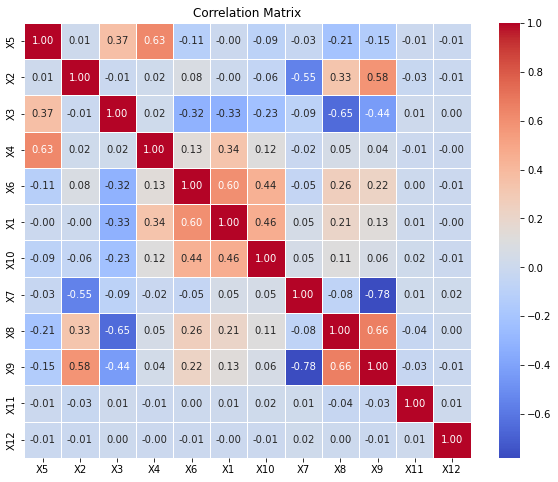

In [7]:
#show the corr matrix between the features
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

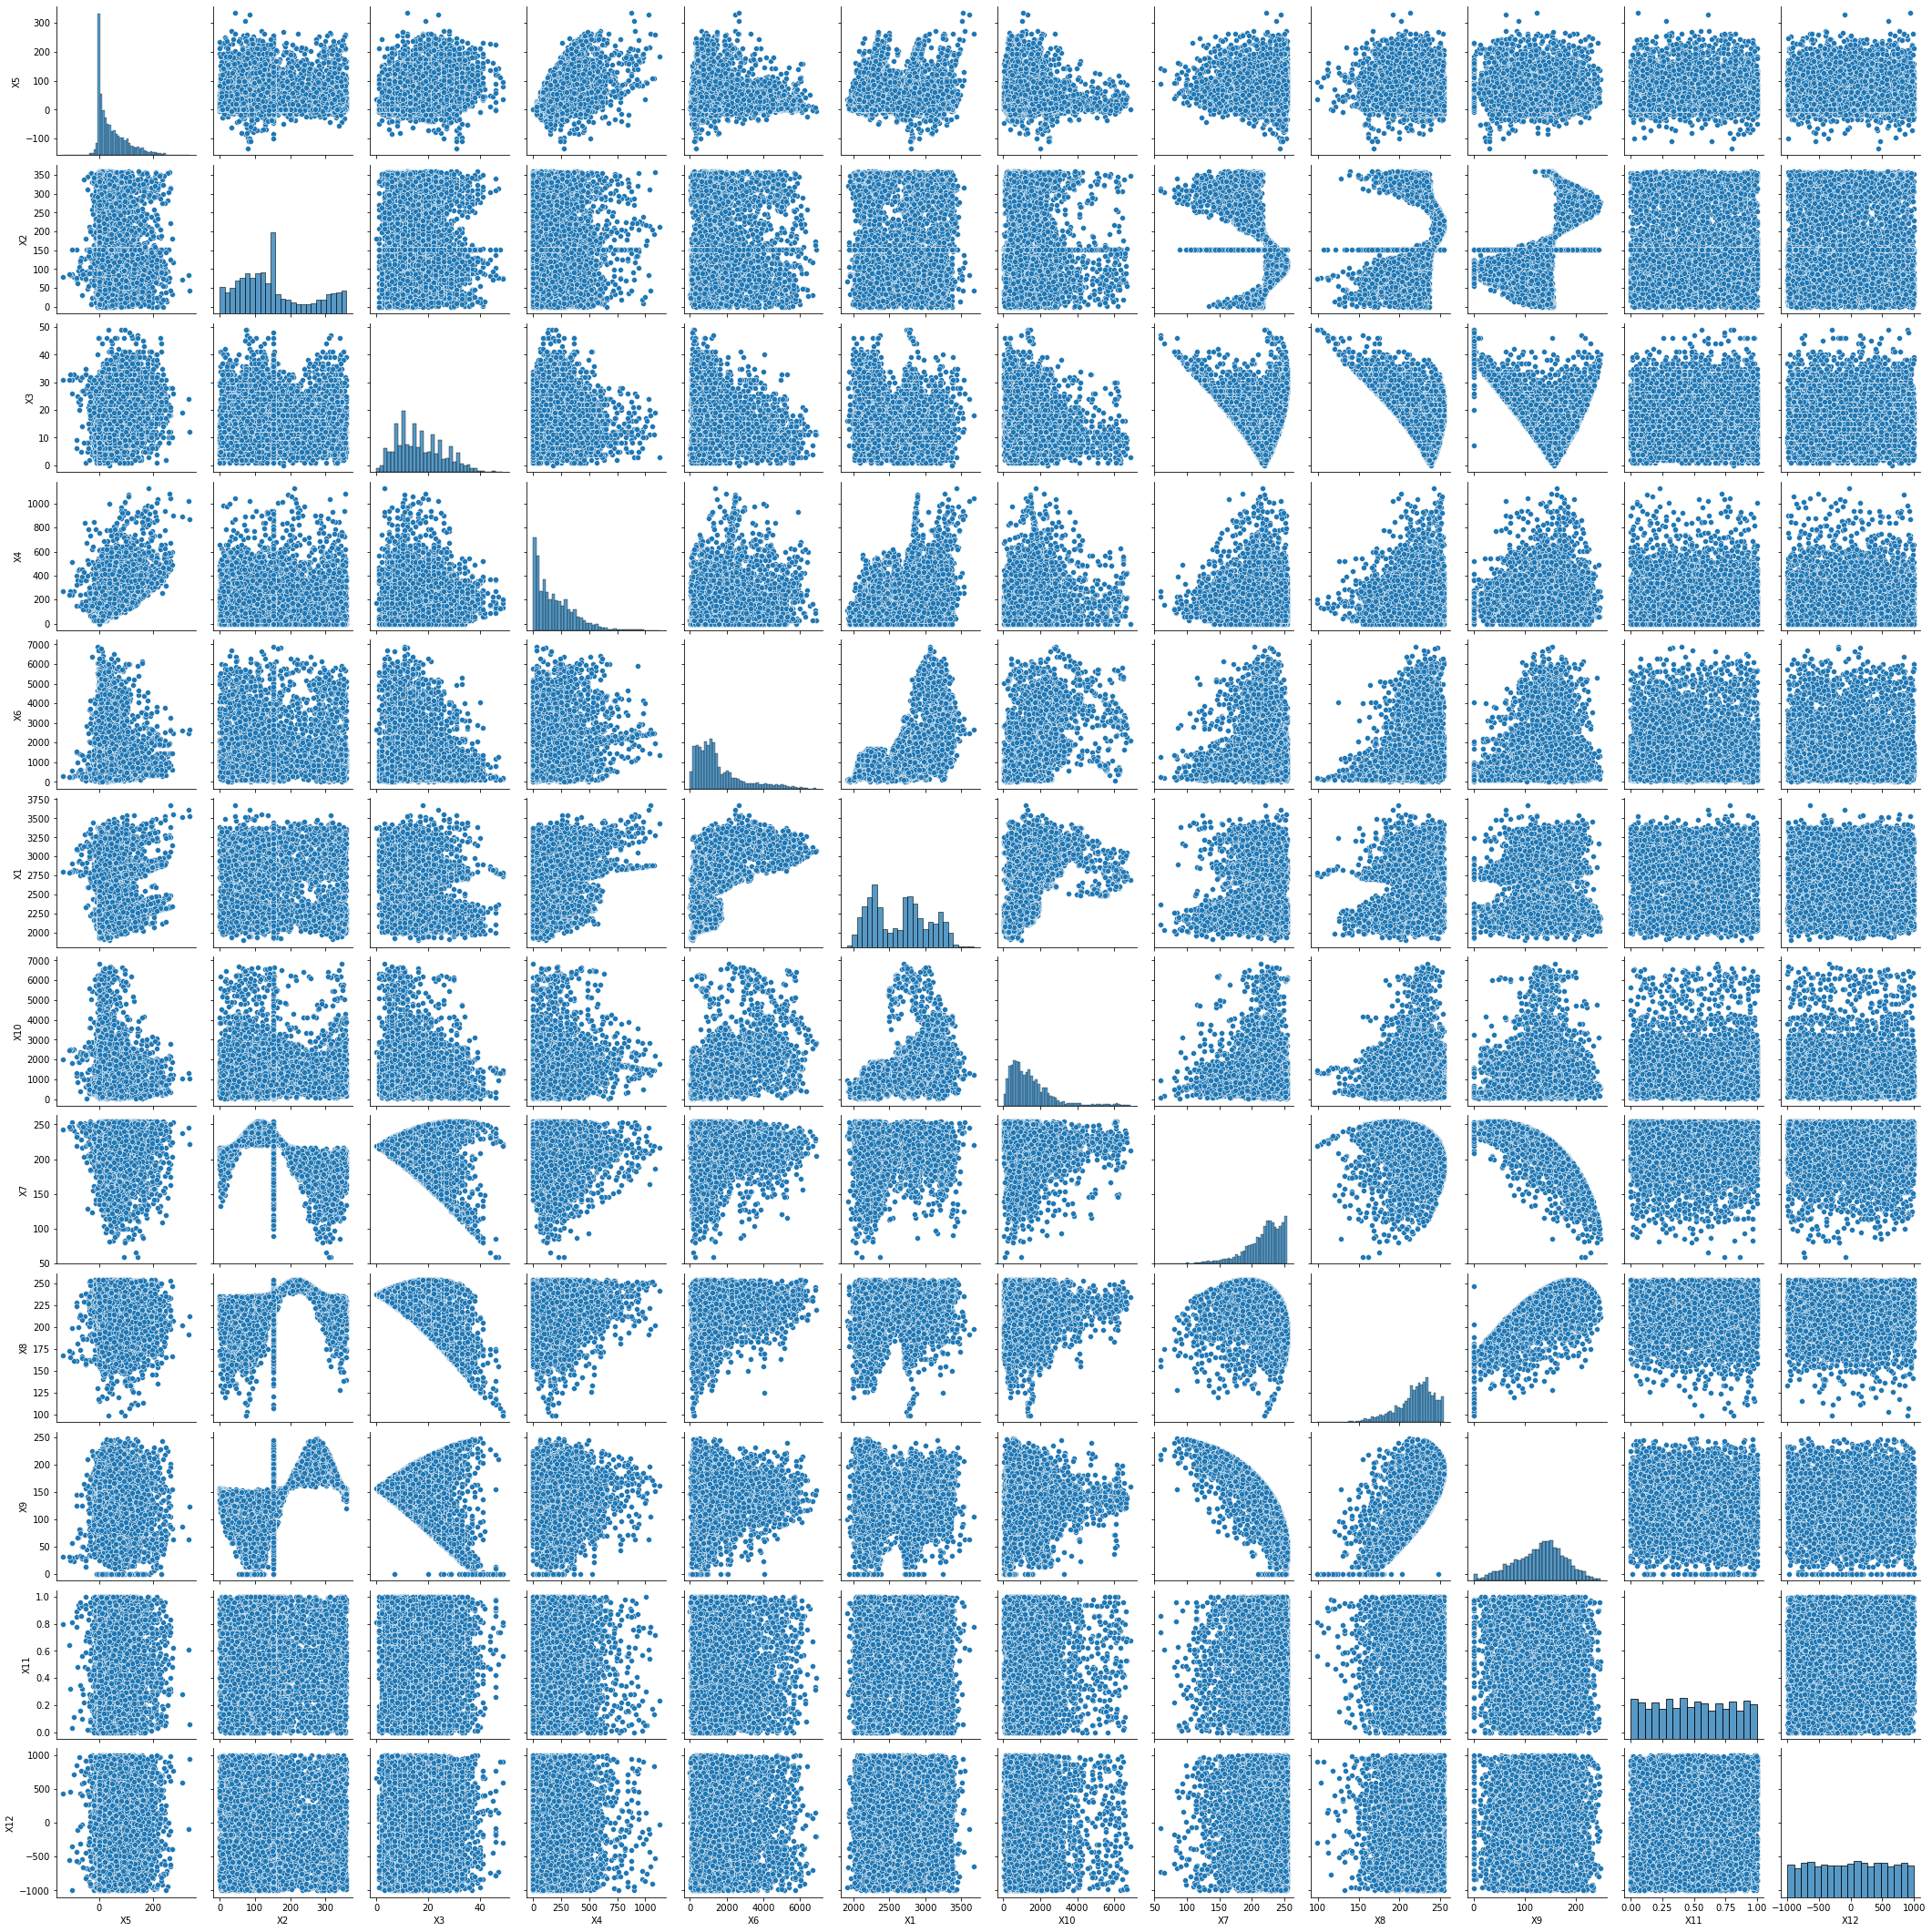

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
dataset = df.copy(deep = True)
categorical_cols = df.select_dtypes(include=['object']).columns

data_encoded = pd.get_dummies(df, columns=[col for col in categorical_cols if col != 'Y'])

label_encoder = LabelEncoder()
df = data_encoded.copy(deep = True)
data_encoded['Y'] = label_encoder.fit_transform(df['Y'])
print(data_encoded.columns)
# df = data_encoded
df.dtypes

Index(['X5', 'X2', 'X3', 'X4', 'X6', 'X1', 'X10', 'X7', 'X8', 'X9', 'X11',
       'X12', 'Y', 'X13_ FC11', 'X13_ FC12', 'X13_ FC13', 'X13_ FC14',
       'X14_ CA21', 'X14_ CA22', 'X14_ CA23', 'X14_ CA24', 'X14_ CA25',
       'X14_ CA26', 'X14_ CA30', 'X14_ CA31', 'X14_ CA32', 'X14_ CA33',
       'X14_ CA34', 'X14_ CA36', 'X14_ CA37', 'X14_ CA38', 'X14_ CA39',
       'X14_ CA40', 'X14_ CA41', 'X14_ CA42', 'X14_ CA43', 'X14_ CA44',
       'X14_ CA46', 'X14_ CA48', 'X14_ CA49', 'X14_ CA50', 'X14_ CA51',
       'X14_ CA52', 'X14_ CA53', 'X14_ CA54', 'X14_ CA55', 'X14_ CA58',
       'X14_ CA59', 'X14_ CA60'],
      dtype='object')


X5             int64
X2           float64
X3             int64
X4             int64
X6             int64
X1             int64
X10            int64
X7             int64
X8             int64
X9             int64
X11          float64
X12            int64
Y             object
X13_ FC11      uint8
X13_ FC12      uint8
X13_ FC13      uint8
X13_ FC14      uint8
X14_ CA21      uint8
X14_ CA22      uint8
X14_ CA23      uint8
X14_ CA24      uint8
X14_ CA25      uint8
X14_ CA26      uint8
X14_ CA30      uint8
X14_ CA31      uint8
X14_ CA32      uint8
X14_ CA33      uint8
X14_ CA34      uint8
X14_ CA36      uint8
X14_ CA37      uint8
X14_ CA38      uint8
X14_ CA39      uint8
X14_ CA40      uint8
X14_ CA41      uint8
X14_ CA42      uint8
X14_ CA43      uint8
X14_ CA44      uint8
X14_ CA46      uint8
X14_ CA48      uint8
X14_ CA49      uint8
X14_ CA50      uint8
X14_ CA51      uint8
X14_ CA52      uint8
X14_ CA53      uint8
X14_ CA54      uint8
X14_ CA55      uint8
X14_ CA58      uint8
X14_ CA59    

In [10]:
correlation_matrix = data_encoded.corr()

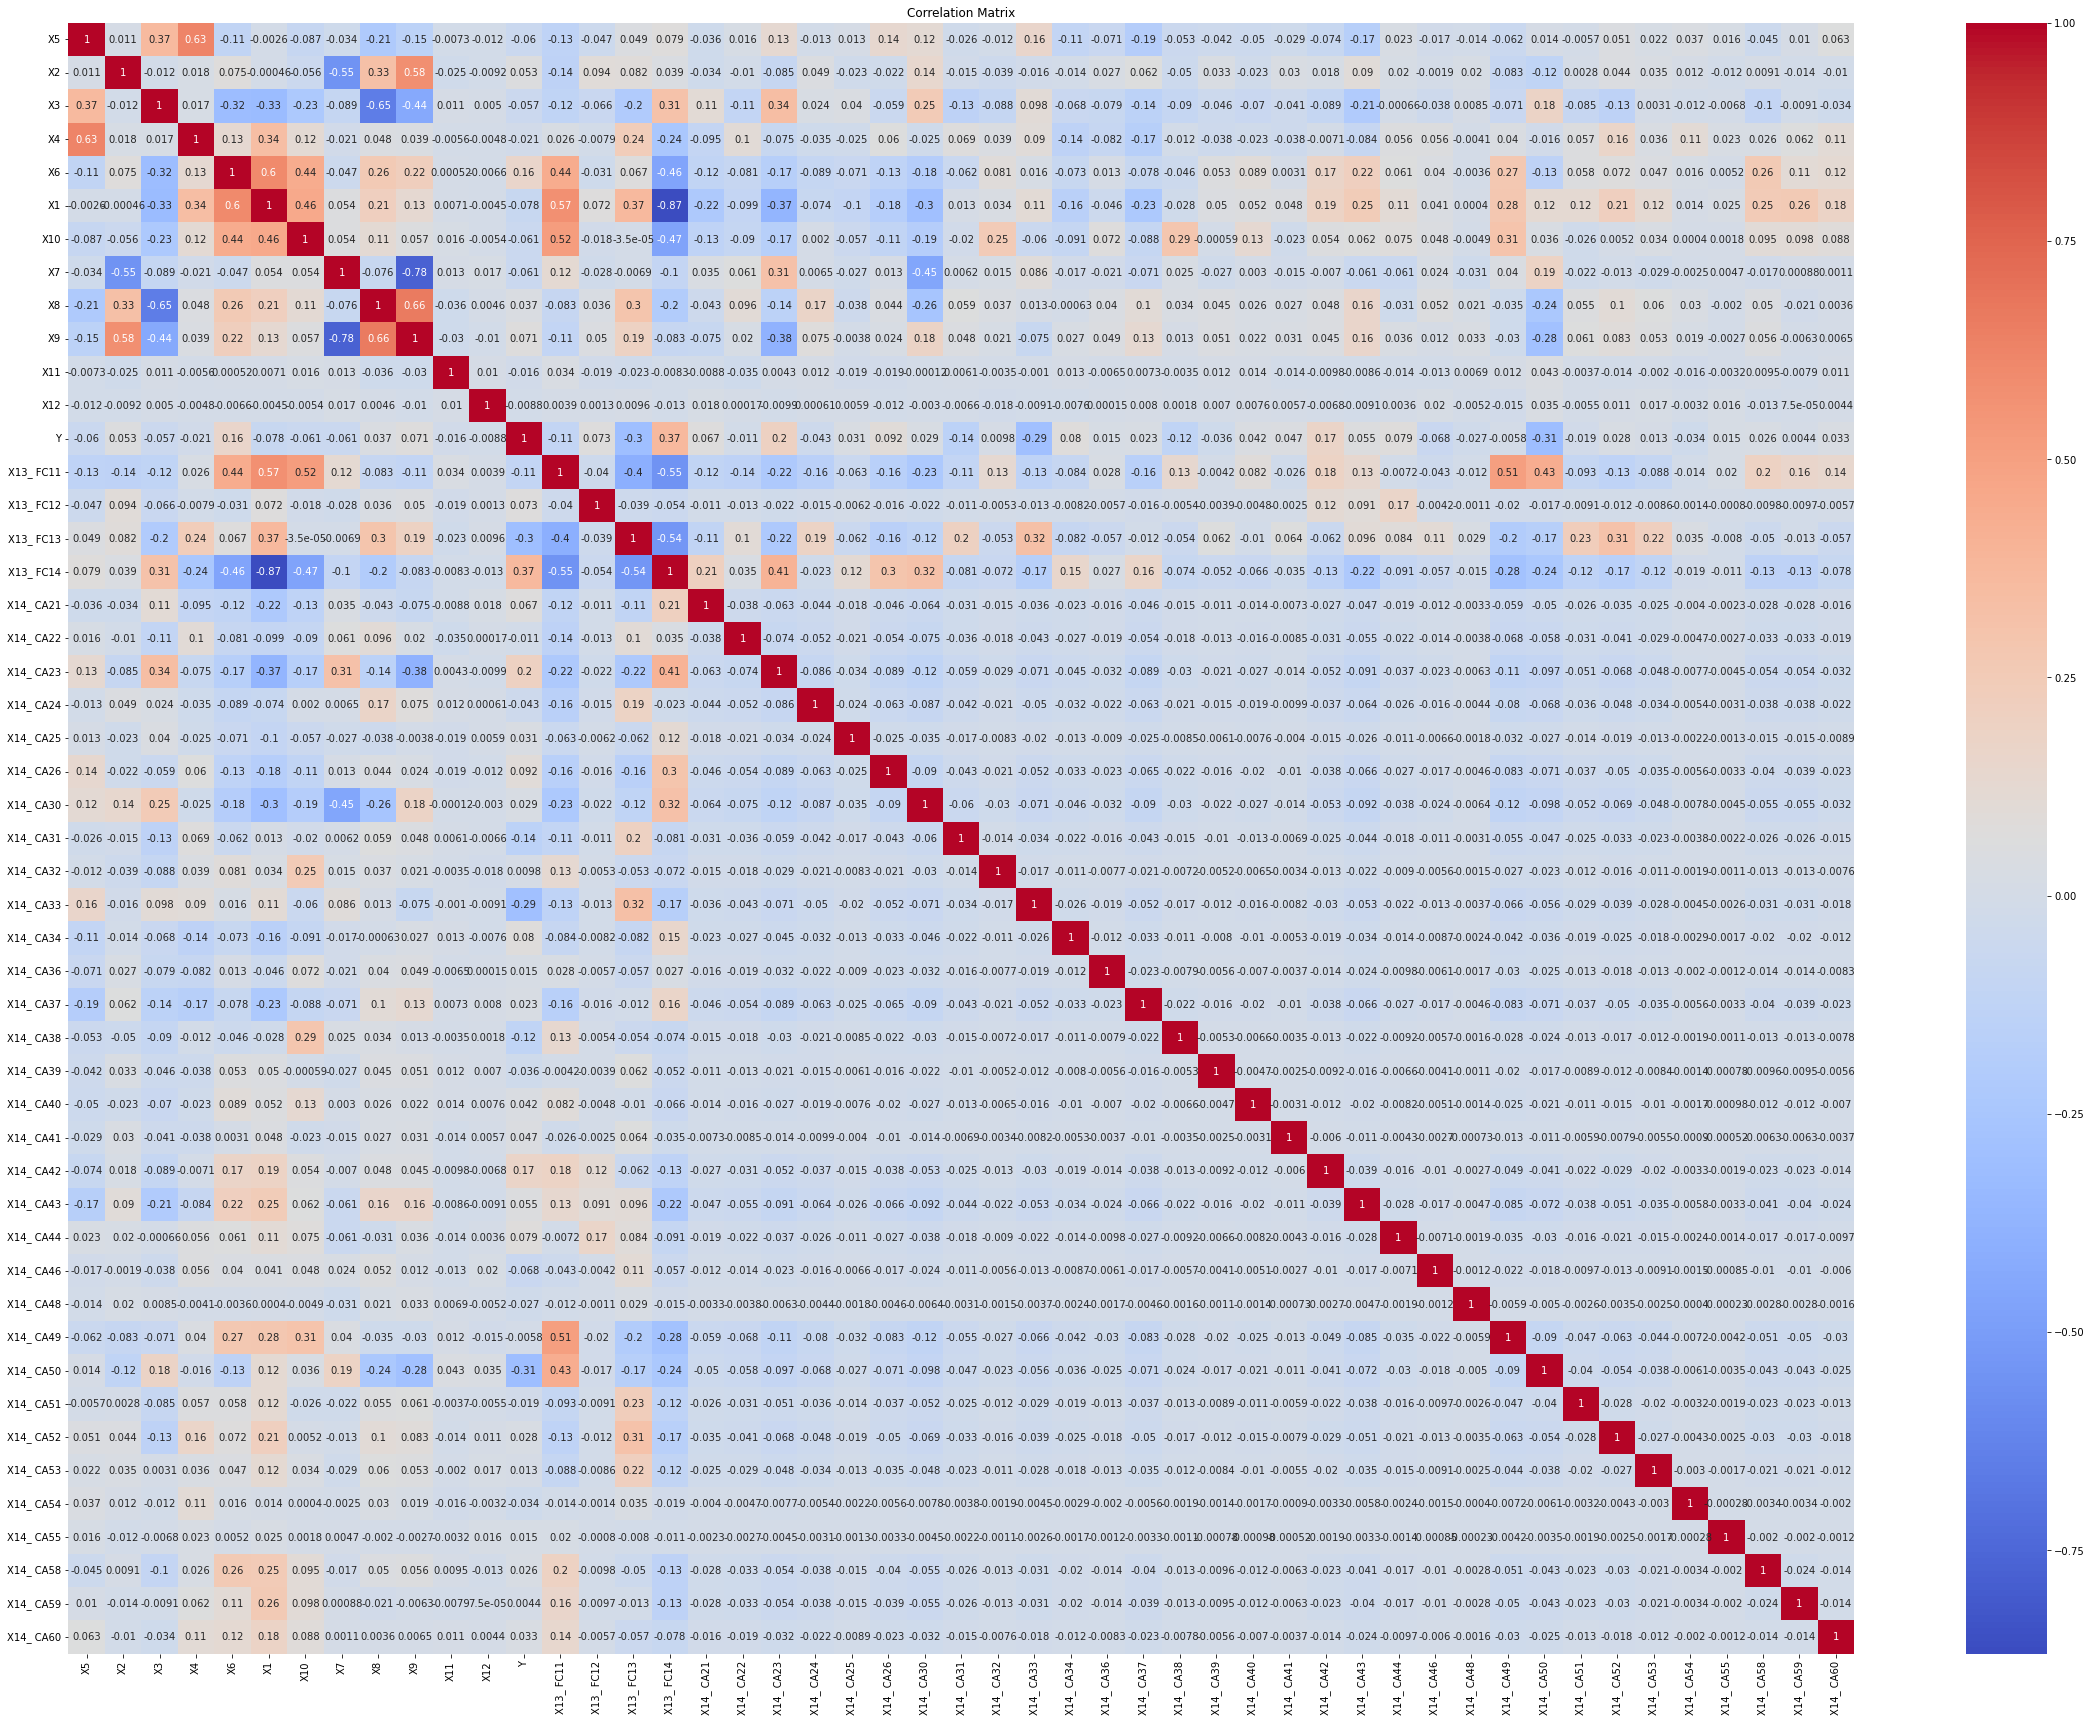

In [11]:
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Imbalances: 

 to deal with the imbalances we will try some approaches one of which is SMOTE



In [12]:
# !pip install --upgrade scikit-learn imbalanced-learn numpy

In [88]:
X = df.drop('Y', axis=1)  # Features
y = df['Y']  # Target variable
#without SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify = y)
print("this is without using SMOTE")
print("The shapes of the training set and the test set")
print(X_train.shape, X_test.shape)

this is without using SMOTE
The shapes of the training set and the test set
(4899, 48) (1225, 48)


In [14]:
from imblearn.over_sampling import SMOTENC

X_smote = dataset.drop('Y', axis=1)  # Features
y_smote = dataset['Y']  # Target variable

categorical_features_indices = [i for i, col in enumerate(X_smote.columns) if X_smote[col].dtype == 'object']

label_encoder = LabelEncoder()
for i in categorical_features_indices:
    X_smote.iloc[:, i] = label_encoder.fit_transform(X_smote.iloc[:, i])

# Split the dataset into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote, random_state=777)

# Apply SMOTENC
smotenc = SMOTENC(categorical_features=categorical_features_indices, random_state=777)
X_train_smote, y_train_smote = smotenc.fit_resample(X_train_smote, y_train_smote)
print("the shape of the training set while using SMOTE")
print(X_train_smote.shape)
print(X_test_smote.shape)

the shape of the training set while using SMOTE
(7776, 14)
(1225, 14)


In [15]:
print("we have dealt with the imbalances using SMOTE here are the classes and their count: \n")
print(np.unique(y_train_smote, return_counts = True))
print(X_train_smote)

we have dealt with the imbalances using SMOTE here are the classes and their count: 

(array(['BMW', 'Ford', 'GMC', 'Honda', 'Mercedes', 'Toyota'], dtype=object), array([1296, 1296, 1296, 1296, 1296, 1296], dtype=int64))
       X5          X2  X3   X4    X6    X1   X10   X7   X8   X9       X11  \
0     128  183.000000  22  319  1126  2253   579  220  248  150  0.130000   
1      16  108.000000   3  342  5367  3199  2363  225  236  146  0.170000   
2      74  118.000000  18  201  4567  2864  4849  248  221   93  0.230000   
3      69   82.000000  21  120   134  2708  1779  244  197   73  0.850000   
4     103  123.000000  15  418  1006  2390   999  244  228  110  0.120000   
...   ...         ...  ..  ...   ...   ...   ...  ...  ...  ...       ...   
7771   12   43.101023  17   59  1693  2962  1277  217  207  119  0.808718   
7772   54  348.182570  19  348  1165  3311   729  181  205  159  0.592752   
7773    0  100.510438  17  219   620  3046   668  245  215   92  0.883013   
7774   65

# we will be scaling the data using standardization, mean = 0 and std =1 

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
scaler.fit(X_train_smote)
X_train_smote = scaler.transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)

# For the sake of testing I will be try models both with and without SMOTE
## we will be using GridSearchCV with Cross Validation to tune the hyperparameters
### First let's Try Decision Tree

In [18]:
def train_model_cv(model, param_grid, X, Y, prin = True): 
    
    grid_search = GridSearchCV(model, param_grid, cv = 10, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X, Y)
    if prin: 
        print("Best Parameters: ", grid_search.best_params_)
    
    
    return grid_search

In [19]:
def test_result(model, X_test, Y_test, prin = True):
    pred = model.predict(X_test)
    f1 = f1_score(Y_test, pred, average='macro')  
    cm = confusion_matrix(Y_test, pred)
    if prin:
        print("F1 Score: ", f1)
        print(classification_report(Y_test, pred))
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()
    return  {"parameters: " : model.best_params_, "F1 Score: " : f1}


In [20]:
from sklearn.tree import DecisionTreeClassifier
#These will be the hyperparameters that I will be testing for Decision tree 
dt = DecisionTreeClassifier(random_state=777)

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [21]:
# Without SMOTE 

print("Results for dataset without using SMOTE")

best_dt = train_model_cv(dt, param_grid_dt, X_train, y_train)

Results for dataset without using SMOTE
Best Parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}


F1 Score:  0.8538173465431246
              precision    recall  f1-score   support

         BMW       0.93      0.94      0.94       314
        Ford       0.68      0.65      0.67        20
         GMC       0.81      0.82      0.82        62
       Honda       0.89      0.88      0.89       250
    Mercedes       0.93      0.94      0.94       324
      Toyota       0.89      0.87      0.88       255

    accuracy                           0.90      1225
   macro avg       0.86      0.85      0.85      1225
weighted avg       0.90      0.90      0.90      1225



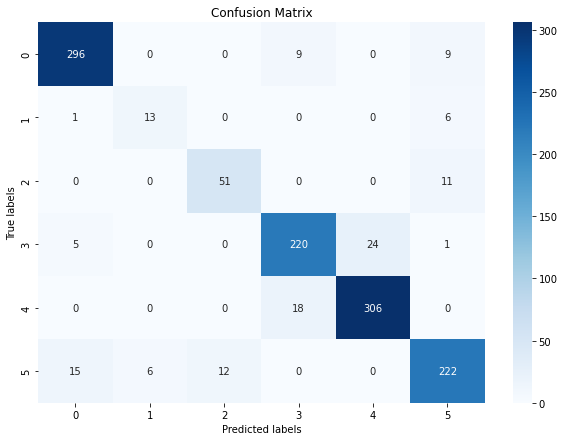

In [22]:
dt_results = test_result(best_dt, X_test, y_test)

In [29]:
#with SMOTE

print("Results for dataset with SMOTE")

best_dt_smote = train_model_cv(dt, param_grid_dt, X_train_smote, y_train_smote)




Results for dataset with SMOTE
Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}


F1 Score:  0.8669156142982324
              precision    recall  f1-score   support

         BMW       0.92      0.94      0.93       314
        Ford       0.63      0.85      0.72        20
         GMC       0.83      0.87      0.85        62
       Honda       0.86      0.86      0.86       250
    Mercedes       0.93      0.92      0.93       324
      Toyota       0.93      0.89      0.91       255

    accuracy                           0.90      1225
   macro avg       0.85      0.89      0.87      1225
weighted avg       0.90      0.90      0.90      1225



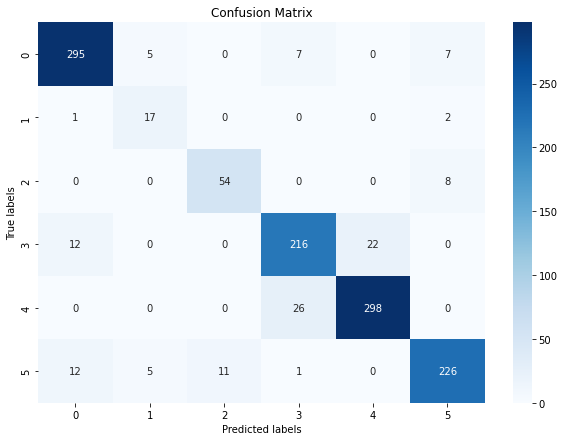

In [30]:
dt_smote_results = test_result(best_dt_smote, X_test_smote, y_test_smote)

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression( random_state=777, max_iter=1000, solver = 'saga') # I will be using saga since it works with all penalities

param_grid_log = {
    'C': np.logspace(-4, 4, 20), 
    'penalty' : ['l1', 'l2', 'elasticnet', 'None'], # penalities 
    'multi_class': ['multinomial', 'ovr'] #whether we wanna use multinomial or one Vs Rest
}




In [24]:
# Without SMOTE 

print("Results for dataset without SMOTE")
best_log_rg = train_model_cv(log_reg, param_grid_log, X_train, y_train)


Results for dataset without SMOTE


C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1179, in fit
    raise ValueError("l1_ratio must be specified when pe

Best Parameters:  {'C': 11.288378916846883, 'multi_class': 'multinomial', 'penalty': 'l1'}


C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


F1 Score:  0.782617827337673
              precision    recall  f1-score   support

         BMW       0.89      0.94      0.91       314
        Ford       0.65      0.65      0.65        20
         GMC       0.70      0.56      0.62        62
       Honda       0.82      0.73      0.77       250
    Mercedes       0.86      0.91      0.88       324
      Toyota       0.86      0.86      0.86       255

    accuracy                           0.85      1225
   macro avg       0.79      0.77      0.78      1225
weighted avg       0.84      0.85      0.84      1225



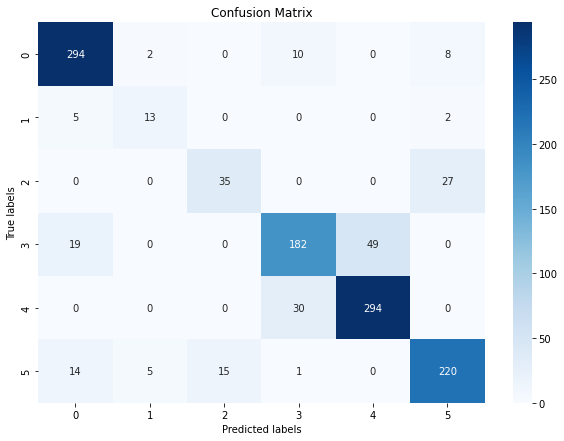

In [25]:
log_results = test_result(best_log_rg, X_test, y_test)

In [27]:
#with SMOTE

print("Results for dataset with SMOTE")
best_log_rg_smote = train_model_cv(log_reg, param_grid_log, X_train_smote, y_train_smote)

Results for dataset with SMOTE


C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1179, in fit
    raise ValueError("l1_ratio must be specified when pe

Best Parameters:  {'C': 11.288378916846883, 'multi_class': 'multinomial', 'penalty': 'l2'}


F1 Score:  0.7337939844066276
              precision    recall  f1-score   support

         BMW       0.88      0.85      0.87       314
        Ford       0.33      0.95      0.49        20
         GMC       0.53      0.84      0.65        62
       Honda       0.76      0.76      0.76       250
    Mercedes       0.87      0.86      0.86       324
      Toyota       0.89      0.69      0.78       255

    accuracy                           0.80      1225
   macro avg       0.71      0.82      0.73      1225
weighted avg       0.83      0.80      0.81      1225



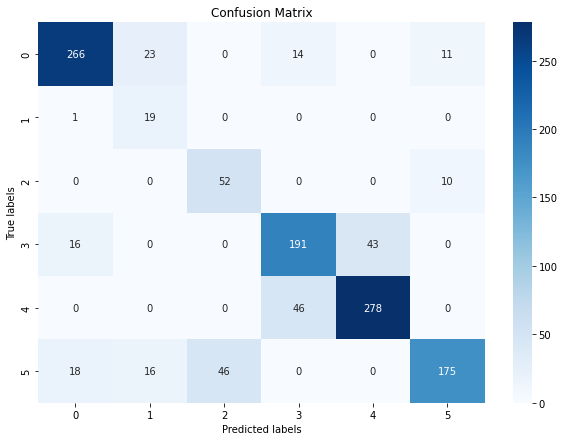

In [28]:
log_results_smote = test_result(best_log_rg_smote, X_test_smote, y_test_smote)

In [38]:
from sklearn.neural_network import MLPClassifier

param_grid_NN = {
    'hidden_layer_sizes': [(100,), (100, 100)],  
    'activation': ['tanh', 'relu'],              
    'solver': ['adam'],                          
    'alpha': [0.001, 0.01],                    
    'learning_rate_init': [0.001],               
    'max_iter': [100, 250, 500]                            
}

NN = MLPClassifier(random_state=777)

In [32]:
print("Results for dataset without SMOTE")

best_NN = train_model_cv(NN, param_grid_NN, X_train, y_train)

Results for dataset without SMOTE
Best Parameters:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.001, 'max_iter': 250, 'solver': 'adam'}


C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


F1 Score:  0.8903661903113628
              precision    recall  f1-score   support

         BMW       0.92      0.97      0.95       314
        Ford       0.81      0.65      0.72        20
         GMC       0.90      0.87      0.89        62
       Honda       0.95      0.88      0.91       250
    Mercedes       0.94      0.98      0.96       324
      Toyota       0.92      0.91      0.92       255

    accuracy                           0.93      1225
   macro avg       0.91      0.88      0.89      1225
weighted avg       0.93      0.93      0.93      1225



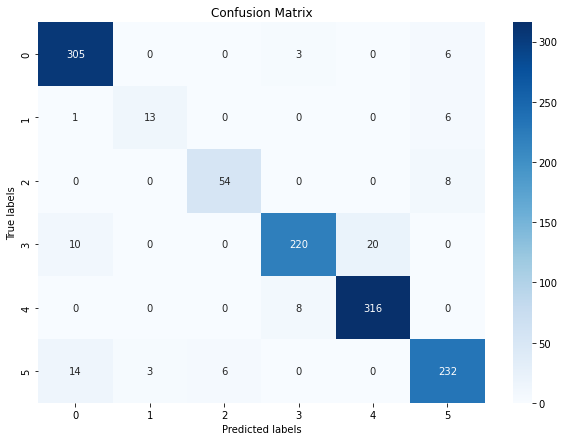

In [33]:
NN_results = test_result(best_NN, X_test, y_test)

In [34]:
print("Results for dataset with SMOTE")
best_NN_smote = train_model_cv(NN, param_grid_NN, X_train_smote, y_train_smote)

Results for dataset with SMOTE
Best Parameters:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'adam'}


C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


F1 Score:  0.885122406692158
              precision    recall  f1-score   support

         BMW       0.93      0.95      0.94       314
        Ford       0.74      0.85      0.79        20
         GMC       0.82      0.90      0.86        62
       Honda       0.90      0.85      0.87       250
    Mercedes       0.92      0.95      0.94       324
      Toyota       0.94      0.88      0.91       255

    accuracy                           0.91      1225
   macro avg       0.87      0.90      0.89      1225
weighted avg       0.91      0.91      0.91      1225



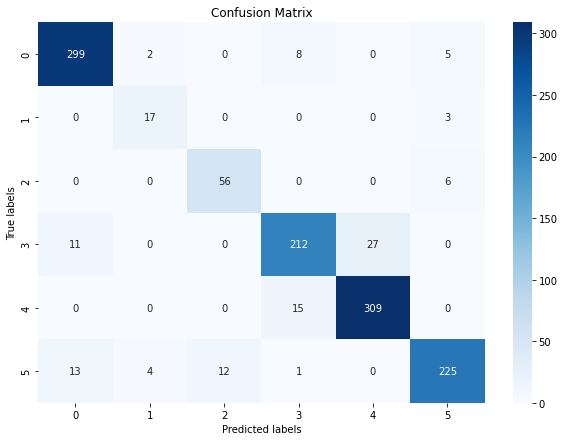

In [35]:
NN_results_smote = test_result(best_NN_smote, X_test_smote, y_test_smote)

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 777)

param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

In [ ]:
print("Results for dataset without SMOTE")
best_rf = train_model_cv(rf, param_grid_rf, X_train, y_train)

F1 Score:  0.9041350673063633
              precision    recall  f1-score   support

         BMW       0.91      0.99      0.95       314
        Ford       0.79      0.75      0.77        20
         GMC       0.92      0.87      0.89        62
       Honda       0.96      0.89      0.92       250
    Mercedes       0.95      0.98      0.97       324
      Toyota       0.95      0.90      0.92       255

    accuracy                           0.94      1225
   macro avg       0.91      0.90      0.90      1225
weighted avg       0.94      0.94      0.94      1225



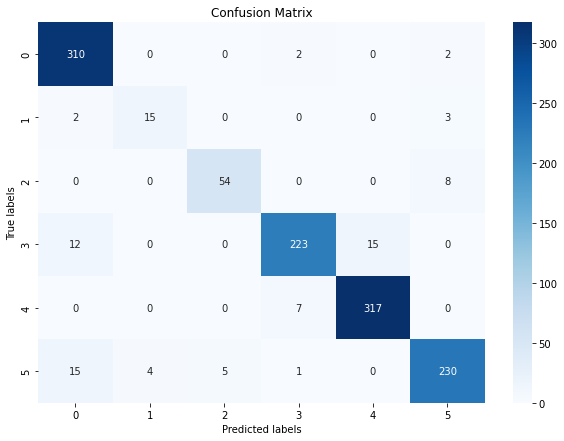

In [49]:
rf_results = test_result(best_rf, X_test, y_test)

In [50]:
print("Results for dataset with SMOTE")

best_rf_smote = train_model_cv(rf, param_grid_rf, X_train_smote, y_train_smote)

Results for dataset with SMOTE
Best Parameters:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


F1 Score:  0.9145975344526028
              precision    recall  f1-score   support

         BMW       0.94      0.98      0.96       314
        Ford       0.76      0.80      0.78        20
         GMC       0.90      0.92      0.91        62
       Honda       0.95      0.91      0.93       250
    Mercedes       0.96      0.98      0.97       324
      Toyota       0.96      0.91      0.94       255

    accuracy                           0.95      1225
   macro avg       0.91      0.92      0.91      1225
weighted avg       0.95      0.95      0.95      1225



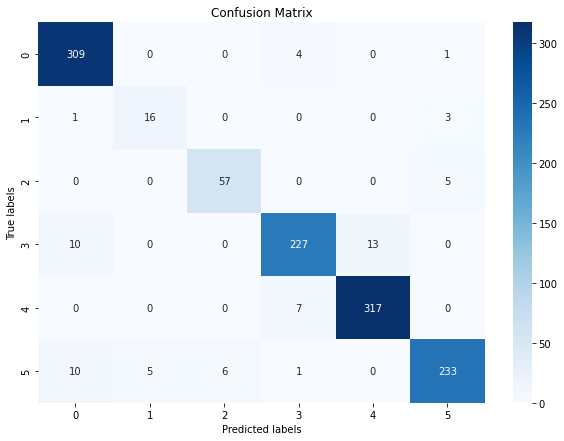

In [51]:
rf_results_smote = test_result(best_rf_smote, X_test_smote, y_test_smote)

In [60]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier()

param_grid_ada = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 1],  # Weight applied to each classifier at each boosting iteration
    'base_estimator__max_depth': [1, 2, 3]  # Max depth for the base decision trees
}

ada = AdaBoostClassifier(base_estimator=base_estimator)


In [61]:
print("Results for dataset without SMOTE")
best_ada = train_model_cv(ada, param_grid_ada, X_train, y_train)

Results for dataset without SMOTE


C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters:  {'base_estimator__max_depth': 3, 'learning_rate': 1, 'n_estimators': 200}


F1 Score:  0.6864933126787078
              precision    recall  f1-score   support

         BMW       0.92      0.83      0.88       314
        Ford       0.75      0.75      0.75        20
         GMC       0.77      0.39      0.52        62
       Honda       0.50      0.93      0.65       250
    Mercedes       0.93      0.35      0.50       324
      Toyota       0.75      0.91      0.82       255

    accuracy                           0.72      1225
   macro avg       0.77      0.69      0.69      1225
weighted avg       0.79      0.72      0.70      1225



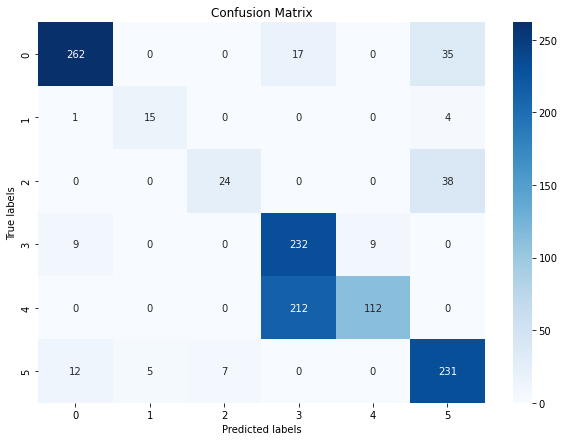

In [62]:
ada_results = test_result(best_ada, X_test, y_test)

In [64]:
print("Results for dataset with SMOTE")
best_ada_smote = train_model_cv(ada, param_grid_ada, X_train_smote, y_train_smote)

Results for dataset with SMOTE


C:\Users\Faisal\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters:  {'base_estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 50}


F1 Score:  0.7693334357518786
              precision    recall  f1-score   support

         BMW       0.86      0.91      0.88       314
        Ford       0.44      0.90      0.59        20
         GMC       0.62      0.73      0.67        62
       Honda       0.78      0.77      0.77       250
    Mercedes       0.89      0.87      0.88       324
      Toyota       0.90      0.75      0.82       255

    accuracy                           0.83      1225
   macro avg       0.75      0.82      0.77      1225
weighted avg       0.84      0.83      0.83      1225



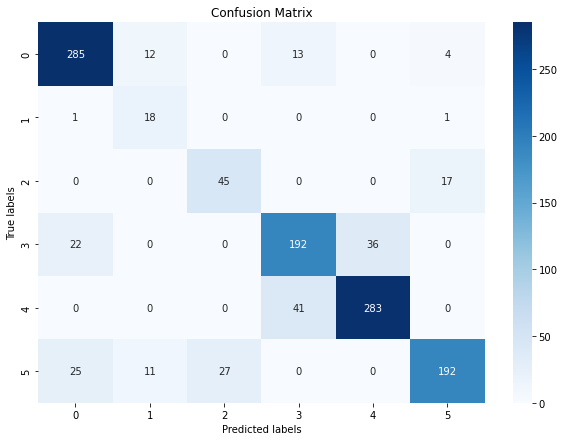

In [65]:
ada_results_smote = test_result(best_ada_smote, X_test_smote, y_test_smote)

In [63]:
# !pip install xgboost 

In [89]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [84]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Number of gradient boosted trees. Equivalent to the number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting. Range is [0,1]
    'max_depth': [3, 4, 5],  # Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit
    'subsample': [0.7, 0.8, 0.9],  # Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost randomly collects half of the data instances to grow trees and this will prevent overfitting.
    'colsample_bytree': [0.7, 0.8, 0.9]  # Subsample ratio of columns when constructing each tree.
}

xgb = XGBClassifier(eval_metric='logloss', random_state = 777)

In [90]:
best_xgb = train_model_cv(xgb, param_grid_xgb, X_train, y_train)

Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}


F1 Score:  0.9052355851593119
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       314
           1       0.88      0.70      0.78        20
           2       0.93      0.85      0.89        62
           3       0.94      0.90      0.92       250
           4       0.95      0.97      0.96       324
           5       0.94      0.93      0.93       255

    accuracy                           0.94      1225
   macro avg       0.93      0.89      0.91      1225
weighted avg       0.94      0.94      0.94      1225



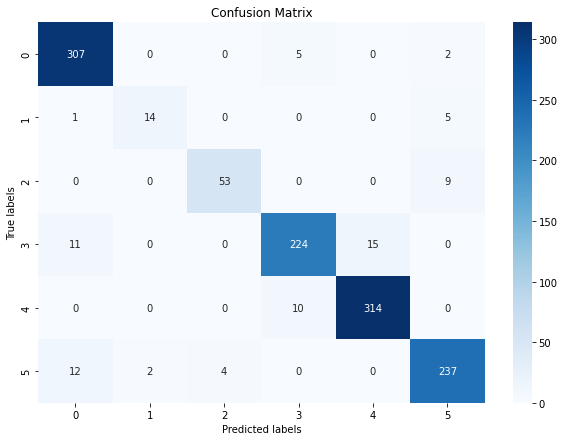

In [91]:
xgb_results = test_result(best_xgb, X_test, y_test)

In [81]:
encoder = LabelEncoder()
y_train_smote = encoder.fit_transform(y_train_smote)
y_test_smote = encoder.fit_transform(y_test_smote)

In [86]:
best_xgb_smote = train_model_cv(xgb, param_grid_xgb, X_train_smote, y_train_smote)

Best Parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}


F1 Score:  0.9230304342451374
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       314
           1       0.77      0.85      0.81        20
           2       0.94      0.95      0.94        62
           3       0.93      0.91      0.92       250
           4       0.96      0.97      0.96       324
           5       0.97      0.92      0.94       255

    accuracy                           0.95      1225
   macro avg       0.92      0.93      0.92      1225
weighted avg       0.95      0.95      0.95      1225



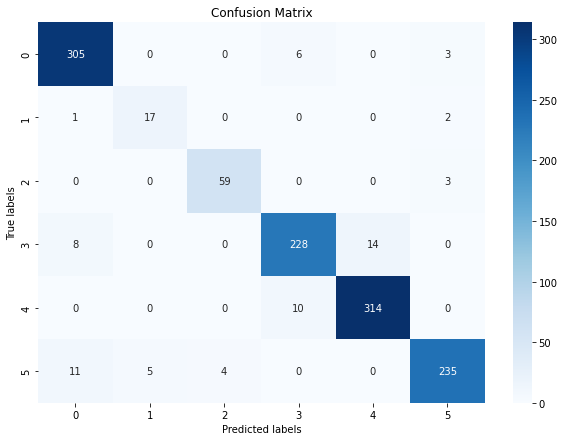

In [87]:
xgb_results_smote = test_result(best_xgb_smote, X_test_smote, y_test_smote)

In [92]:
models = ['Decision Tree', 'Logistic Regression', 'Neural Network', 'Random Forest', 'AdaBoost', 'XGBoost']

In [103]:
dict_list = [
    dt_results, 
    log_results,
    NN_results,
    rf_results,
    ada_results,
    xgb_results
]

In [105]:
dict_list_smote = [
    dt_smote_results, 
    log_results_smote,
    NN_results_smote,
    rf_results_smote,
    ada_results_smote,
    xgb_results_smote
]

## the F1 score for all models without using SMOTE

In [106]:
result_df = pd.DataFrame(dict_list)
result_df

parameters:   F1 Score: 
0  {'criterion': 'gini', 'max_depth': 20, 'min_sa...    0.853817
1  {'C': 11.288378916846883, 'multi_class': 'mult...    0.782618
2  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...    0.890366
3  {'bootstrap': True, 'max_depth': None, 'max_fe...    0.904135
4  {'base_estimator__max_depth': 3, 'learning_rat...    0.686493
5  {'colsample_bytree': 0.8, 'learning_rate': 0.2...    0.905236

## the F1 score for all models using SMOTE

In [107]:
result_smote_df = pd.DataFrame(dict_list_smote)
result_smote_df

parameters:   F1 Score: 
0  {'criterion': 'entropy', 'max_depth': 20, 'min...    0.866916
1  {'C': 11.288378916846883, 'multi_class': 'mult...    0.733794
2  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...    0.885122
3  {'bootstrap': False, 'max_depth': None, 'max_f...    0.914598
4  {'base_estimator__max_depth': 3, 'learning_rat...    0.769333
5  {'colsample_bytree': 0.9, 'learning_rate': 0.2...    0.923030

In [115]:
print("The best results for the dataset without SMOTE")
for model, result_dict in zip(models, dict_list):
    if 'F1 Score: ' in result_dict and result_dict['F1 Score: '] > max_f1_score:
        max_f1_score = result_dict['F1 Score: ']
        best_model = model

print(f"The best model is {best_model} with an F1 score of {max_f1_score}")

The best model is XGBoost with an F1 score of 0.9052355851593119


In [117]:

max_f1_score = 0
best_model = ''
best_model_first_value = ''

for model, result_dict in zip(models, dict_list):
    if 'F1 Score: ' in result_dict:
        f1_score = result_dict['F1 Score: ']
        first_value = next(iter(result_dict.values())) # Get the first value in the dictionary
        if f1_score > max_f1_score:
            max_f1_score = f1_score
            best_model = model
            best_model_first_value = first_value

print(f"\nThe best model is {best_model} with the following parameters '{best_model_first_value}' and an F1 Score of {max_f1_score}")


The best model is XGBoost with the following parameters '{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}' and an F1 Score of 0.9052355851593119


In [119]:
print("for The dataset using SMOTE")
max_f1_score = 0
best_model = ''
best_model_first_value = ''

for model, result_dict in zip(models, dict_list_smote):
    if 'F1 Score: ' in result_dict:
        f1_score = result_dict['F1 Score: ']
        first_value = next(iter(result_dict.values())) # Get the first value in the dictionary
        if f1_score > max_f1_score:
            max_f1_score = f1_score
            best_model = model
            best_model_first_value = first_value

print(f"\nThe best model is {best_model} with the following parameters '{best_model_first_value}' and an F1 Score of {max_f1_score}")

for The dataset using SMOTE

The best model is XGBoost with the following parameters '{'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}' and an F1 Score of 0.9230304342451374


## it appears that using SMOTE to deal with imbalances has proven to be helpful the F1 score for the models that used SMOTE are generally higher specifically for models with high varience

Some possible imoprovements: 

increasing the capacity for some models might be a good idea but due to time constraints as well as computational limits we went with what we could.